In [2]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
btc_usd = quandl.get("BITFINEX/BTCUSD")

In [4]:
btc_usd.head()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2014-04-15,513.9000,452.00,504.23500,505.0000,503.5000,504.97,21013.584774
2014-04-16,547.0000,495.00,537.50000,538.0000,537.0000,538.00,29633.358705
2014-04-17,538.5000,486.10,507.02000,508.0000,506.0400,508.00,20709.783819
2014-04-18,509.0000,474.25,483.77000,482.7500,482.7500,484.79,10458.045243
2014-04-19,513.9899,473.83,505.01065,507.4999,502.5313,507.49,8963.618369


In [5]:
btc_usd.tail()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2019-06-28,12369.0,10799.0,12244.5,12244.805006,12241.0,12248.0,33115.313604
2019-06-29,12417.0,11354.0,12098.5,12098.000000,12098.0,12099.0,20768.574796
2019-06-30,12234.0,10889.0,10995.5,10995.000000,10995.0,10996.0,17303.444011
2019-07-01,11231.0,10088.0,10546.5,10537.000000,10546.0,10547.0,26340.341955
2019-07-02,10965.0,9728.2,10830.5,10830.000000,10830.0,10831.0,28556.246016


In [7]:
price = pd.Series(btc_usd['Last'], dtype='float')
price.index = pd.to_datetime(btc_usd.index) 

In [8]:
price.head()

Date
2014-04-15    505.0000
2014-04-16    538.0000
2014-04-17    508.0000
2014-04-18    482.7500
2014-04-19    507.4999
Name: Last, dtype: float64

In [28]:
price_acf = sm.tsa.stattools.acf(price, nlags=40) #ラグ=40(デフォルト値)、省略可能
price_acf

array([1.        , 0.99600649, 0.99198854, 0.98776991, 0.98292065,
       0.97843045, 0.97405321, 0.96948439, 0.96512913, 0.9604724 ,
       0.95588815, 0.95079827, 0.94606872, 0.94164952, 0.93756017,
       0.93414493, 0.9305498 , 0.92777888, 0.92471973, 0.92096977,
       0.91695518, 0.91252119, 0.90818629, 0.90429998, 0.90056491,
       0.89672701, 0.89248795, 0.88868007, 0.88485381, 0.88102411,
       0.87685655, 0.87267652, 0.86908473, 0.86547381, 0.86194439,
       0.85856758, 0.85514474, 0.85148908, 0.84800233, 0.84442566,
       0.84100119])

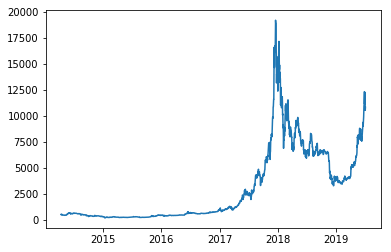

In [9]:
plt.plot(price)

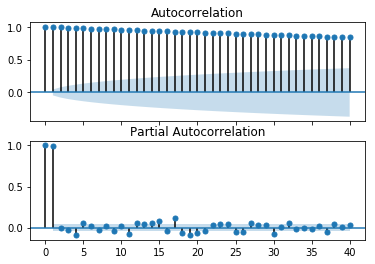

In [70]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
sm.graphics.tsa.plot_acf(price, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(price, lags=40, ax=ax2)

plt.show()

In [71]:
price_change = price.pct_change().to_frame('+1day')

In [12]:
price_change.head()

,+1day
Date,
2014-04-15,NaN
2014-04-16,0.065347
2014-04-17,-0.055762
2014-04-18,-0.049705
2014-04-19,0.051269


In [13]:
price_change['+2day'] = price.pct_change(2)

In [14]:
price_change.head()

,+1day,+2day
Date,,
2014-04-15,NaN,NaN
2014-04-16,0.065347,NaN
2014-04-17,-0.055762,0.005941
2014-04-18,-0.049705,-0.102695
2014-04-19,0.051269,-0.000984


In [15]:
price_change['+3day'] = price.pct_change(3)
price_change['+4day'] = price.pct_change(4)
price_change['+5day'] = price.pct_change(5)
price_change['+6day'] = price.pct_change(6)
price_change['+7day'] = price.pct_change(7)

In [16]:
price_change.head()

,+1day,+2day,+3day,+4day,+5day,+6day,+7day
Date,,,,,,,
2014-04-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-16,0.065347,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-17,-0.055762,0.005941,NaN,NaN,NaN,NaN,NaN
2014-04-18,-0.049705,-0.102695,-0.044059,NaN,NaN,NaN,NaN
2014-04-19,0.051269,-0.000984,-0.056692,0.00495,NaN,NaN,NaN


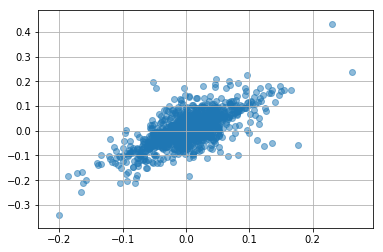

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
plt.scatter(price_change['+1day'], price_change['+2day'], alpha=0.5)

plt.show()

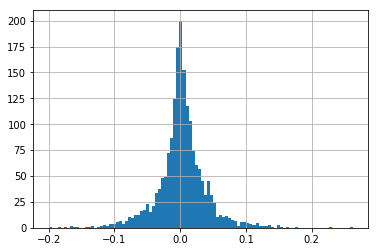

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.grid(True)
plt.hist(price_change['+1day'].dropna(), bins=100)

plt.show()

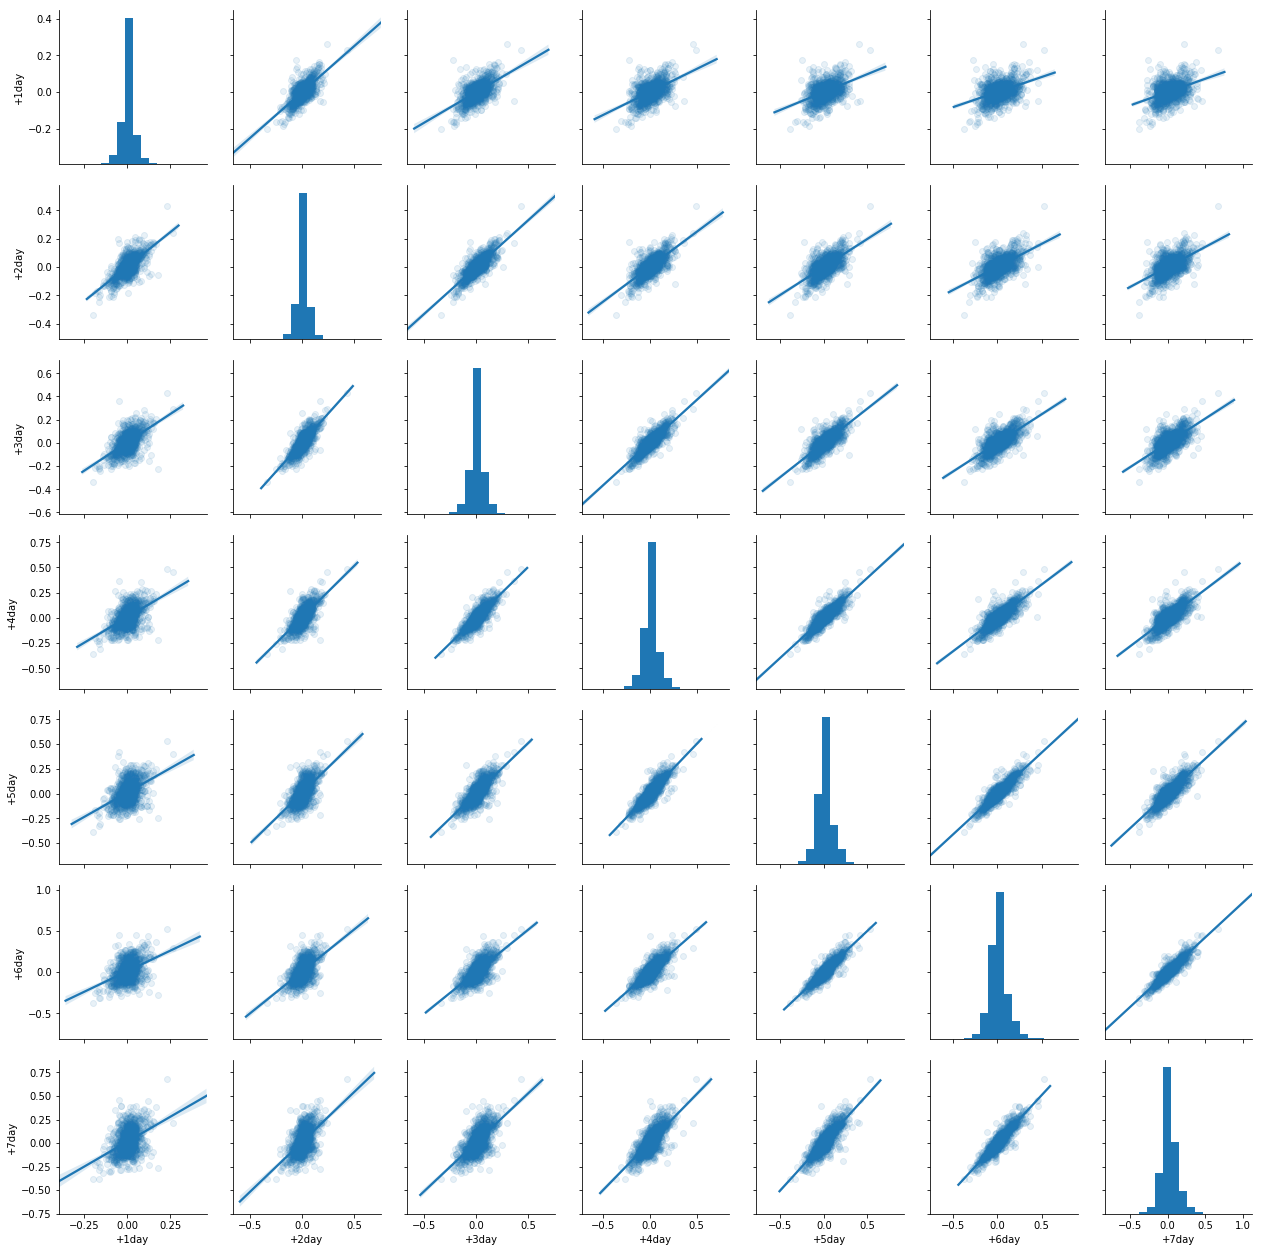

In [43]:
sns.pairplot(price_change.dropna(), kind='reg', plot_kws={'scatter_kws': {'alpha': 0.1}})